#Handwritten Character Recognition

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


👉Load Data

In [87]:
train_dir = pd.read_csv('/content/drive/MyDrive/emnist-balanced-train.csv')
test_dir = pd.read_csv('/content/drive/MyDrive/emnist-balanced-test.csv')

In [88]:
train_dir.shape, test_dir.shape

((112799, 785), (18799, 785))

👉Data Cleaning (Remove 'nan' values)

In [89]:
print(train_dir.isna().sum())
print(test_dir.isna().sum())

45       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.529    0
0.530    0
0.531    0
0.532    0
0.533    0
Length: 785, dtype: int64
41       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.528    0
0.529    0
0.530    0
0.531    0
0.532    0
Length: 785, dtype: int64


In [90]:
# # because the last data topic have several 'nan' values
# train_dir = train_dir.iloc[:-1, :]
# test_dir = test_dir.iloc[:-1, :]

In [91]:
print(train_dir.isna().sum())
print(test_dir.isna().sum())

45       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.529    0
0.530    0
0.531    0
0.532    0
0.533    0
Length: 785, dtype: int64
41       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.528    0
0.529    0
0.530    0
0.531    0
0.532    0
Length: 785, dtype: int64


👉Map for the labels

labels are mapped to ascii values of the character in the image.

In [92]:
map = {0 : 48,
1 : 49,
2 : 50,
3 : 51,
4 : 52,
5 : 53,
6 : 54,
7 : 55,
8 : 56,
9 : 57,
10 : 65,
11 : 66,
12 : 67,
13 : 68,
14 : 69,
15 : 70,
16 : 71,
17 : 72,
18 : 73,
19 : 74,
20 : 75,
21 : 76,
22 : 77,
23 : 78,
24 : 79,
25 : 80,
26 : 81,
27 : 82,
28 : 83,
29 : 84,
30 : 85,
31 : 86,
32 : 87,
33 : 88,
34 : 89,
35 : 90,
36 : 97,
37 : 98,
38 : 100,
39 : 101,
40 : 102,
41 : 103,
42 : 104,
43 : 110,
44 : 113,
45 : 114,
46 : 116}

In [93]:
num_train_images = train_dir.shape[0]
num_test_images = test_dir.shape[0]

num_train_images, num_test_images

(112799, 18799)

👉Visualizing the data

Text(0.5, 1.0, '1')

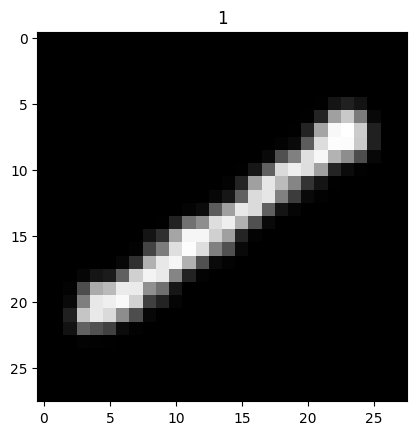

In [94]:
import random
t = random.randint(0, num_train_images-1)
plt.imshow(np.asarray(train_dir.iloc[t, 1:]).reshape([28,28]), cmap='gray')
plt.title(chr(map[train_dir.iloc[t, 0]]))

👉Seperate Data and Label for train and test data

In [95]:
X_train = np.asarray(train_dir.iloc[:, 1:])
Y_train = np.asarray(train_dir.iloc[:, 0])

X_test = np.asarray(train_dir.iloc[:, 1:])
Y_test = np.asarray(train_dir.iloc[:, 0])

👉Normalise

In [96]:
X_train = X_train/255.0
X_test = X_test/255.0

👉Reshaping the images

In [97]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

👉One-hot encoding of labels

In [98]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 47)
Y_test = to_categorical(Y_test, num_classes = 47)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [99]:
Y_train.shape, Y_test.shape

((112799, 47), (112799, 47))

In [100]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((112799, 28, 28, 1), (112799, 47), (112799, 28, 28, 1), (112799, 47))

In [101]:
X_train.dtype, Y_train.dtype, X_test.dtype, Y_test.dtype

(dtype('float64'), dtype('int64'), dtype('float64'), dtype('int64'))

Text(0.5, 1.0, '2')

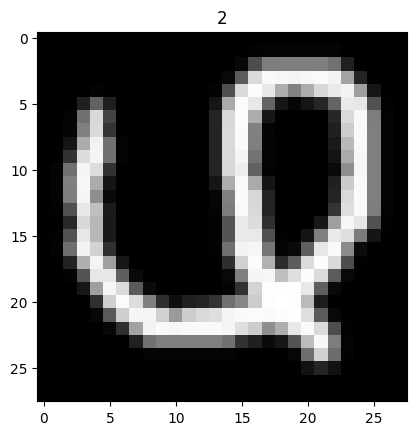

In [102]:
import random
t = random.randint(0, num_train_images-1)
plt.imshow(X_train[t], cmap='gray')
plt.title(chr(map[np.argmax(Y_train[t])]))

👉 Making the orientation of image correct

Flipping it horizontally and then rotate it 90 degrees anticlockwise

In [103]:
def flip_and_rotate_90anticlockwise(image):
    # Horizontal flip
    flipped_image = np.fliplr(image)
    # Rotate 90 degrees anticlockwise
    rotated_image = np.rot90(flipped_image.reshape(28, 28), k=1).reshape(28, 28, 1)
    return rotated_image

In [104]:
X_train = np.asarray([flip_and_rotate_90anticlockwise(image) for image in X_train])
X_test = np.asarray([flip_and_rotate_90anticlockwise(image) for image in X_test])

Text(0.5, 1.0, 'W')

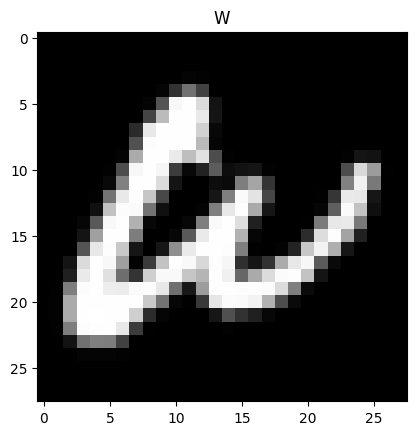

In [108]:
import random
t = random.randint(0, num_train_images-1)
plt.imshow(X_train[t], cmap='gray')
plt.title(chr(map[np.argmax(Y_train[t])]))

👉Define Model

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [125]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(47, activation='softmax')
])

In [126]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

👉Training the Model

In [127]:
history = model.fit(X_train, Y_train, batch_size = 32, steps_per_epoch=len(X_train)/32, epochs = 30, validation_data=(X_test, Y_test))

model.save('/content/drive/MyDrive/Handwritten_Character_Recognition_model.h5')

Epoch 1/30
3524/3524 [==============================] - 145s 41ms/step - loss: 0.7211 - accuracy: 0.7765 - val_loss: 0.4428 - val_accuracy: 0.8518
Epoch 2/30
3524/3524 [==============================] - 145s 41ms/step - loss: 0.4233 - accuracy: 0.8554 - val_loss: 0.3638 - val_accuracy: 0.8729
Epoch 3/30
3524/3524 [==============================] - 129s 37ms/step - loss: 0.3661 - accuracy: 0.8704 - val_loss: 0.3189 - val_accuracy: 0.8844
Epoch 4/30
3524/3524 [==============================] - 144s 41ms/step - loss: 0.3306 - accuracy: 0.8802 - val_loss: 0.2898 - val_accuracy: 0.8942
Epoch 5/30
3524/3524 [==============================] - 140s 40ms/step - loss: 0.3046 - accuracy: 0.8885 - val_loss: 0.2686 - val_accuracy: 0.8998
Epoch 6/30
3524/3524 [==============================] - 144s 41ms/step - loss: 0.2824 - accuracy: 0.8948 - val_loss: 0.2492 - val_accuracy: 0.9037
Epoch 7/30
3524/3524 [==============================] - 140s 40ms/step - loss: 0.2672 - accuracy: 0.8991 - val_loss: 0

👉Test Accuracy

In [128]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('\nTest accuracy:', test_acc)

3525/3525 - 33s - loss: 0.1033 - accuracy: 0.9576 - 33s/epoch - 9ms/step

Test accuracy: 0.957588255405426


👉Visualizing performance

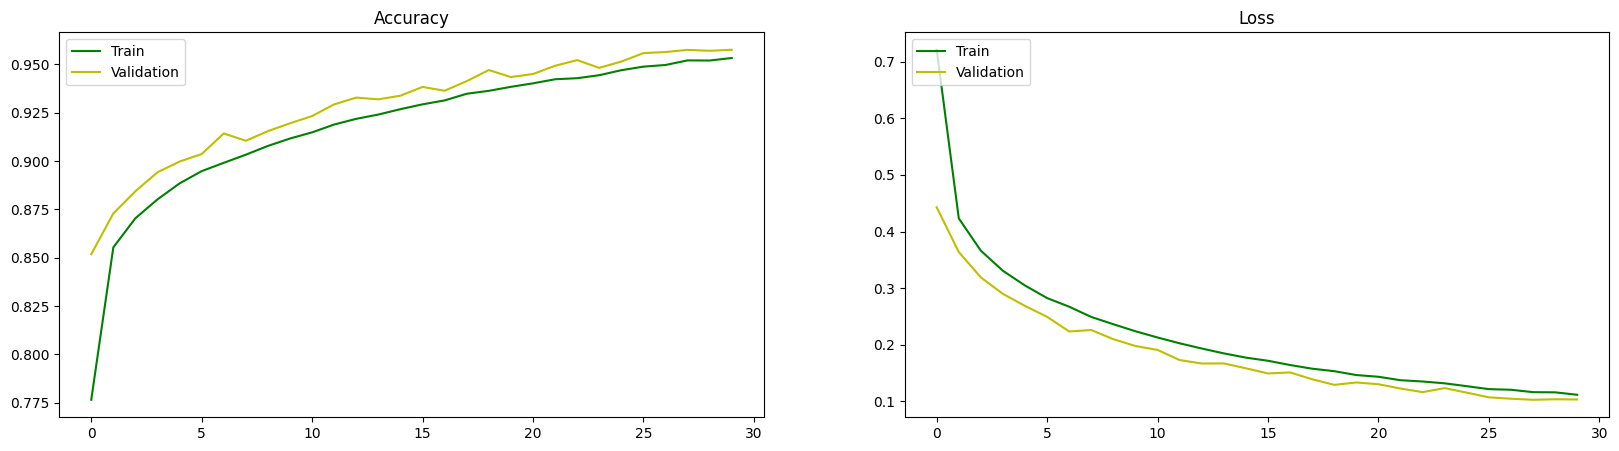

In [129]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1.plot(history.history['accuracy'], color='g', )
ax1.plot(history.history['val_accuracy'], color='y')
ax1.set_title('Accuracy')
ax1.legend(['Train', 'Validation'], loc='upper left')

ax2.plot(history.history['loss'], color='g', )
ax2.plot(history.history['val_loss'], color='y')
ax2.set_title('Loss')
ax2.legend(['Train', 'Validation'], loc='upper left')

👉Predicting on Given data

In [131]:
import random
t = random.randint(0, num_test_images-1)
img = X_test[t]
label = np.argmax(Y_test[t])

In [132]:
label

15

Text(0.5, 1.0, 'F')

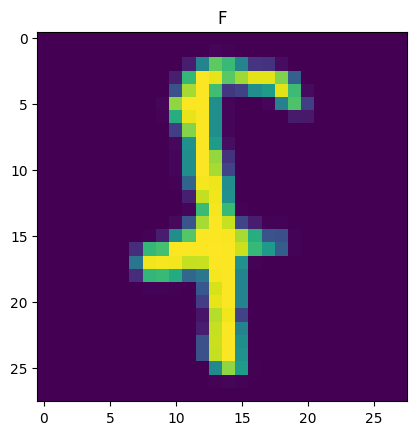

In [133]:
plt.imshow(img)
plt.title(chr(map[label]))

In [134]:
img.shape

(28, 28, 1)

In [135]:
pred = model.predict(img.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 109ms/step


In [136]:
chr(map[np.argmax(pred)])

'f'

👉Predicting on new data

In [137]:
from PIL import Image

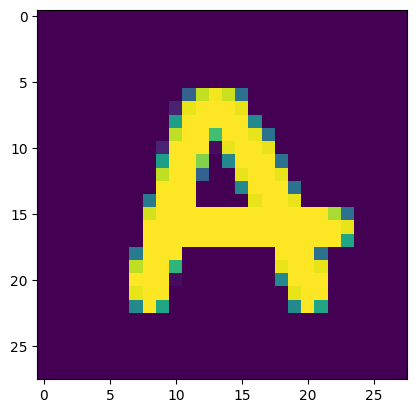

In [148]:
image = '/content/temp_test.png'
image = Image.open(image)
image = image.resize((28, 28))
image = image.convert('L')

image = np.asarray(image)
image = image.reshape(28, 28, 1)
image = image.astype('float64')
image = image/255.0

plt.imshow(image)

In [149]:
pred = model.predict(image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 22ms/step


In [150]:
chr(map[np.argmax(pred)])

'A'

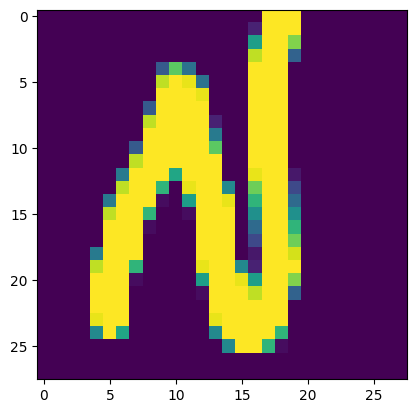

In [151]:
image = '/content/temp_test.png'
image = Image.open(image)
image = image.resize((28, 28))
image = image.convert('L')

image = np.asarray(image)
image = image.reshape(28, 28, 1)
image = image.astype('float64')
image = image/255.0

plt.imshow(image)

In [152]:
pred = model.predict(image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 135ms/step


In [153]:
chr(map[np.argmax(pred)])

'N'

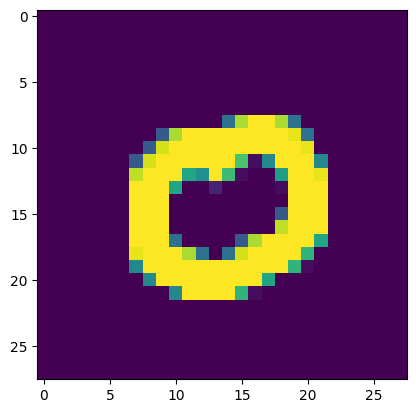

In [154]:
image = '/content/temp_test.png'
image = Image.open(image)
image = image.resize((28, 28))
image = image.convert('L')

image = np.asarray(image)
image = image.reshape(28, 28, 1)
image = image.astype('float64')
image = image/255.0

plt.imshow(image)

In [155]:
pred = model.predict(image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 26ms/step


In [156]:
chr(map[np.argmax(pred)])

'O'